<a href="https://colab.research.google.com/github/vergarajit/Face-recognition/blob/main/Data-processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install imbalanced-learn package
!pip install imbalanced-learn==0.8.0
!pip install contractions



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from google.colab import files

import string

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from contractions import fix
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [ ]:
f = files.upload()

Saving part-00000-tid-9136122565017344171-3f98196e-e0c5-4bb5-90cc-d523170ef713-86080-1-c000.json to part-00000-tid-9136122565017344171-3f98196e-e0c5-4bb5-90cc-d523170ef713-86080-1-c000.json


In [ ]:
# Replace 'your_file_path.json' with the actual path to your JSON file
with open('part-00000-tid-9136122565017344171-3f98196e-e0c5-4bb5-90cc-d523170ef713-86080-1-c000.json', 'r') as file:
    data = [json.loads(line) for line in file]

df= pd.DataFrame(data)
df.head()

,asin,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime,verified,style,vote,image
0,B00005QDPX,5.0,Crazy Taxi is by far one of the best video gam...,A36TDX8DY2XK5Q,Some Kid,It's Party Time! Let's Have Some Fun!,1054252800,false,NaN,NaN,NaN
1,B000MXIMKK,4.0,I love these pants!\n\nFor those of us who sla...,AZZ1YPRM2FAUH,David Colgrove,"Durable, good looking slacks at a reasonable p...",1459900800,true,"{""Size:"":"" 33W x 30L"",""Color:"":"" Graphite""}",6,NaN
2,B00005QDPX,2.0,Anyone who hasn't played this game should rent...,A3PASG15BRR40D,SleepyJD,A fun game that gets old too quickly,1049414400,false,NaN,NaN,NaN
3,B000MXIMKK,5.0,Great pants and nice crease.,A388UHKJN07JJT,TJK,Great Product,1459900800,true,"{""Size:"":"" 42W x 30L"",""Color:"":"" Black""}",NaN,NaN
4,B00005QDPX,4.0,In this game you choose a driver and car then ...,A29YLR71A42A3N,Amazon Customer,Fun and Entertaining,1040860800,false,NaN,3,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55933 entries, 0 to 55932
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asin            55933 non-null  object
 1   overall         55933 non-null  object
 2   reviewText      55912 non-null  object
 3   reviewerID      55933 non-null  object
 4   reviewerName    55933 non-null  object
 5   summary         55925 non-null  object
 6   unixReviewTime  55933 non-null  object
 7   verified        55933 non-null  object
 8   style           34938 non-null  object
 9   vote            11801 non-null  object
 10  image           164 non-null    object
dtypes: object(11)
memory usage: 4.7+ MB


In [ ]:
df.nunique()

asin                686
overall               5
reviewText        49605
reviewerID        46392
reviewerName      36513
summary           35929
unixReviewTime     5546
verified              2
style              2183
vote                131
image               160
dtype: int64

In [ ]:
df.isnull().sum()

asin                  0
overall               0
reviewText           21
reviewerID            0
reviewerName          0
summary               8
unixReviewTime        0
verified              0
style             20995
vote              44132
image             55769
dtype: int64

In [ ]:
columns_to_drop=['image', 'vote', 'style', 'verified', 'summary', 'reviewerName', 'reviewerID', 'asin']

In [ ]:
final_df= df.drop(columns=columns_to_drop)

In [ ]:
# Convert the 'unixReviewTime' column to datetime format
final_df['standardTime'] = pd.to_datetime(final_df['unixReviewTime'], unit='s')

# Format the datetime values as "year-month-day"
final_df['date'] = final_df['standardTime'].dt.strftime('%Y-%m-%d')

In [ ]:
final_df=final_df.drop(columns=['unixReviewTime', 'standardTime'])
final_df.head()

,overall,reviewText,date
0,5.0,Crazy Taxi is by far one of the best video gam...,2003-05-30
1,4.0,I love these pants!\n\nFor those of us who sla...,2016-04-06
2,2.0,Anyone who hasn't played this game should rent...,2003-04-04
3,5.0,Great pants and nice crease.,2016-04-06
4,4.0,In this game you choose a driver and car then ...,2002-12-26


In [ ]:
desired_column_order = ['date', 'reviewText', 'overall']

# Reorder the columns using the .reindex() method
final_df = final_df.reindex(columns=desired_column_order)
final_df.head()


,date,reviewText,overall
0,2003-05-30,Crazy Taxi is by far one of the best video gam...,5.0
1,2016-04-06,I love these pants!\n\nFor those of us who sla...,4.0
2,2003-04-04,Anyone who hasn't played this game should rent...,2.0
3,2016-04-06,Great pants and nice crease.,5.0
4,2002-12-26,In this game you choose a driver and car then ...,4.0


In [ ]:
dataset=final_df.dropna()
dataset.isnull().sum()

date          0
reviewText    0
overall       0
dtype: int64

In [ ]:
dataset= dataset.rename(columns={'reviewText': 'review', 'overall': 'rating'})

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55912 entries, 0 to 55932
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    55912 non-null  object
 1   review  55912 non-null  object
 2   rating  55912 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
# Using astype() method
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['review'] = dataset['review'].astype(str)
dataset['rating'] = dataset['rating'].astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55912 entries, 0 to 55932
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    55912 non-null  datetime64[ns]
 1   review  55912 non-null  object        
 2   rating  55912 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
dataset['rating'].unique().tolist()

[5.0, 4.0, 2.0, 1.0, 3.0]

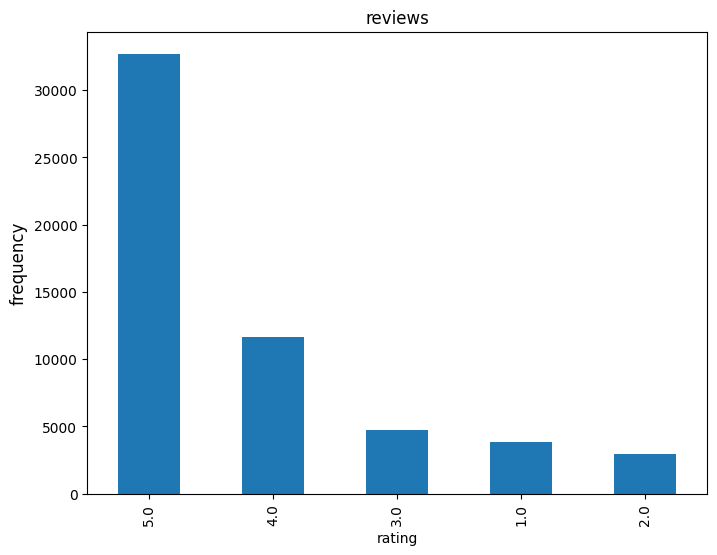

In [ ]:
#Visualize the distribution of the reviews
fig = plt.figure(figsize=(8,6))

dataset.groupby(['rating']).review.count().sort_values(ascending=False).plot.bar(
    ylim=0, title= 'reviews')

plt.ylabel('frequency', fontsize = 12);

In [ ]:
We will shrink the problem to three classes
Positive 4-5
Neutral 3
Negative 1-2

Now, we need to transform the ratings into its respective class
Negative 2
Neutral 1
Positive 0


In [ ]:
#Define a funtion to transform ratings into classess or sentiment

def rating_to_class(rating):
  rating= int(rating)

  if rating >= 4.0:
    return 0

  elif rating == 3.0:
    return 1

  else:
    return 2

In [ ]:
dataset['rating']= dataset['rating'].apply(rating_to_class)
dataset.head()

,date,review,rating
0,2003-05-30,Crazy Taxi is by far one of the best video gam...,0
1,2016-04-06,I love these pants!\n\nFor those of us who sla...,0
2,2003-04-04,Anyone who hasn't played this game should rent...,2
3,2016-04-06,Great pants and nice crease.,0
4,2002-12-26,In this game you choose a driver and car then ...,0


In [ ]:
#name_of_the_dataset_to_be_saved = pd.DataFrame(dataset)

# Guardar el DataFrame en un archivo CSV
#name_of_the_dataset_to_be_saved.to_csv('nombre_del_archivo.csv', index=False)

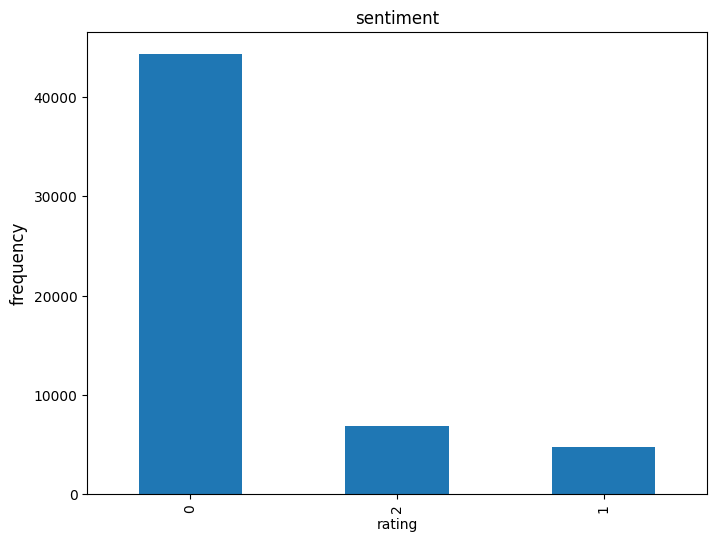

In [ ]:
#Visualize the distribution of the reviews
fig = plt.figure(figsize=(8,6))

dataset.groupby(['rating']).review.count().sort_values(ascending=False).plot.bar(
    ylim=0, title= 'sentiment')

plt.ylabel('frequency', fontsize = 12);

In [ ]:
#Cleaning up
#Now, raw reviews will be processed. Pre-processing actions will be carried ouy to clen the raw reviews and proceed with the sentiment analysis. This actions include remove punctuations, html tags, and stopwords, expand contractions, and lemmatization.

In [ ]:
#Make a copy of the dataset before cleaning
final_dataset= dataset.copy()

In [ ]:
#Define a function to remove the html tag
def remove_html_tag(review):

    return review.replace('<br />', '').replace('\n', ' ')

In [ ]:
#Apply the function to the full dataset
final_dataset['review'] = final_dataset['review'].apply(remove_html_tag)

In [ ]:
#define a function to expand contractions
def expand_contractions(review):
    return fix(review) #Expand contractions I'm to I am

In [ ]:
#Apply the function to expand contractions
final_dataset['review']= final_dataset['review'].apply(expand_contractions)

In [ ]:
#Define a function to remove punctuation
def remove_punctuation(review):
    regular_punct = list(string.punctuation)
    for punc in regular_punct:
        if punc in review:
            review = review.replace(punc, '')
    return review.strip().lower() #Make each word lower case

In [ ]:
#Apply the function to remove punctuation
final_dataset['review'] = final_dataset['review'].apply(remove_punctuation)

In [ ]:
#Define a function to remove words such as 'the', 'a', 'this', and more.
def remove_stopwords(review):
    en_stops = set(stopwords.words('english'))
    review = review.split()
    review = " ".join([word for word in review if not word in en_stops])
    return review

In [ ]:
#Apply the function to remove stopwords
final_dataset['review'] = final_dataset['review'].apply(remove_stopwords)

#Split the reviews into individual words with word_tokenize
final_dataset['review']= final_dataset['review'].apply(word_tokenize)

In [ ]:
#Define a function to lemmatize the words according to its POS tag
def lemma_wordnet(review):

    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word, tag in pos_tag(review): #Pos tagging avoid rule-based truncation
        if tag.startswith('NN'):  # noun
            pos = wordnet.NOUN
        elif tag.startswith('VB'):  # verb
            pos = wordnet.VERB
        elif tag.startswith('JJ'):  # adjective
            pos = wordnet.ADJ
        elif tag.startswith('RB'):  # adverb
            pos = wordnet.ADV
        else:
            pos = wordnet.NOUN  # default to noun if POS tag not recognized
        lemmas.append(lemmatizer.lemmatize(word, pos=pos))
    return lemmas


In [ ]:
# Apply the lemmatize_review function to each review in the DataFrame
final_dataset['review'] = final_dataset['review'].apply(lemma_wordnet)

In [ ]:
#Let's now combine the lemmatized tokens
def combine(input):
    combined= ' '.join(input)
    return combined

In [ ]:
#Apply the combine function
final_dataset['review']= final_dataset['review'].apply(combine)

In [ ]:
final_dataset.head()

,date,review,rating
0,2003-05-30,crazy taxi far one best video game ever play s...,0
1,2016-04-06,love pant u slave business casual comfortable ...,0
2,2003-04-04,anyone play game rent play return do crazy tax...,2
3,2016-04-06,great pant nice crease,0
4,2002-12-26,game choose driver car pick people drive aroun...,0


In [ ]:
#A copy to test undersampling
copy= final_dataset.copy()
df_copy=copy.drop('date', axis=1)

In [ ]:
rus = RandomUnderSampler()
X, y = rus.fit_resample(np.array(df_copy['review']).reshape(-1, 1), np.array(df_copy['rating']).reshape(-1, 1));
training = pd.DataFrame(list(zip([x[0] for x in X], y)), columns = ['review', 'rating']);

In [ ]:
training['rating'].value_counts()

0    4731
1    4731
2    4731
Name: rating, dtype: int64

In [ ]:
m = files.upload()

In [ ]:
# Replace 'your_file_path.json' with the actual path to your JSON file
with open('part-00000-tid-3344574289433532396-3f817a27-d835-4855-8b64-d13674426898-1-1-c000.json', 'r') as metadata:
    m_data = [json.loads(line) for line in metadata]

mdf= pd.DataFrame(m_data)
mdf.head()

,also_buy,also_view,asin,brand,category,date,description,details,feature,fit,image,main_cat,price,rank,similar_item,tech1,tech2,title
0,[],[],6305121869,Ninasill_Blouse,"[Clothing, Shoes & Jewelry, Women, Clothing, T...","<div class=""a-fixed-left-grid a-spacing-none"">...",[(=^ ^=) 1.It is made of high quality material...,{},"[Import, Versatile Occasions - Great for Daily...",,[https://images-na.ssl-images-amazon.com/image...,Movies & TV,$9.99 - $12.50,[],,,,"Women Blouse, Ninasill Hooded Sweatshirt Coat ..."
1,[],[],6318708057,Coolred-Women,"[Clothing, Shoes & Jewelry, Traditional & Cult...","<div class=""a-fixed-left-grid a-spacing-none"">...","[<b><br>Hi friend, welcome to our store. Befor...",{},"[100% Spandex, Order Larger If You are Between...",,[https://images-na.ssl-images-amazon.com/image...,"<img src=""https://images-na.ssl-images-amazon....",$16.08 - $18.36,"14,082,777 in Clothing, Shoes & Jewelry (",,,,Coolred-Women Retro Split Sexy Skinny Premium ...
2,[],"[B07CRJ95M7, B008AHISU4, B07B8F98W2, B07DD98Q7...",6342506256,Gaok,"[Clothing, Shoes & Jewelry, Men, Clothing, Sho...","<div class=""a-fixed-left-grid a-spacing-none"">...",[Gaok men's pants are all made from cotton mat...,{},"[Cotton, Zipper closure, Material:100% cotton,...","class=""a-normal a-align-center a-spacing-smal...",[https://images-na.ssl-images-amazon.com/image...,"<img src=""https://images-na.ssl-images-amazon....",$26.99,"2,877,972 in Clothing, Shoes & Jewelry (",,,,Gaok Men's Retro Cotton Multi-Pocket Camo Carg...
3,"[B077GQQKRV, B07CBJQTF6, B07H2Z6S9J, B06Y26PZ5...","[B07H2Z6S9J, B077GQQKRV, B072XTTTK9, B002DMJOC...",6342509379,QIBOE,"[Clothing, Shoes & Jewelry, Men, Clothing, Jea...","<div class=""a-fixed-left-grid a-spacing-none"">...",[<b>pant size(Unit:inch)</b><br> W30(tag30) Wa...,{},"[Denim, Zipper closure, Material: cotton, Styl...","class=""a-normal a-align-center a-spacing-smal...",[https://images-na.ssl-images-amazon.com/image...,"<img src=""https://images-na.ssl-images-amazon....",$38.99,"1,506,383 in Clothing, Shoes & Jewelry (",,,,QIBOE Men's Baggy Jeans Denim Sweatpants Loose...
4,[],[B00V6F372G],6342522081,OLO,"[Clothing, Shoes & Jewelry, Women, Accessories...",,[All of our sunglasses offer protection agains...,{'ASIN: ': '6342522081'},"[Material: Polycarbonate, Main features: Windp...",,[https://images-na.ssl-images-amazon.com/image...,Sports & Outdoors,$3.29,"936,295 in Sports & Outdoors (",,,,Crazy Explosion-proof Lens Polarized Sunglasse...
